# Resumo de Machine Learning

Este notebook é um resumo dos principais tópicos de Machine Learning que serão abordados na prova. Inclui explicações teóricas, demonstrações e exemplos práticos.

## Álgebra Linear

### Produto Escalar de Tuplas

O produto escalar é uma operação fundamental em álgebra linear que calcula a soma do produto dos elementos correspondentes de duas tuplas (vetores).

**Fórmula:**

$$
\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i
$$

**Exemplo:**

In [11]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

produto_escalar = np.dot(a, b)
print(f"O produto escalar de {a} e {b} é {produto_escalar}")

O produto escalar de [1 2 3] e [4 5 6] é 32


**Saída:**

```
O produto escalar de [1 2 3] e [4 5 6] é 32
```

### Multiplicação de Matrizes

A multiplicação de matrizes é usada para compor transformações lineares ou para resolver sistemas de equações.

**Regra:**

Seja $ A $ uma matriz $ m \times n $ e $ B $ uma matriz $ n \times p $, então o produto $ C = AB $ é uma matriz $ m \times p $.

**Exemplo:**

In [12]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

C = np.matmul(A, B)
print("O produto das matrizes A e B é:\n", C)

O produto das matrizes A e B é:
 [[19 22]
 [43 50]]


**Saída:**

```
O produto das matrizes A e B é:
 [[19 22]
 [43 50]]
```

### Combinação Linear

Uma combinação linear é uma expressão construída a partir de um conjunto de vetores multiplicados por escalares e somados.

**Exemplo:**

Dados os vetores $ v_1 $ e $ v_2 $ e escalares $ \alpha $ e $ \beta $:


In [13]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])
alpha = 3
beta = 4

comb_linear = alpha * v1 + beta * v2
print(f"A combinação linear é {comb_linear}")

A combinação linear é [3 4]


**Saída:**

```
A combinação linear é [3 4]
```

## Matrizes

### Representação de Dados em Matrizes

Em Machine Learning, os dados são frequentemente representados como matrizes, onde cada linha representa uma amostra e cada coluna, uma feature.

**Exemplo:**


In [14]:
# Matriz de dados com 3 amostras e 2 features
X = np.array([[1.5, 2.3],
              [3.1, 0.7],
              [0.8, 4.5]])

print("Matriz de dados:\n", X)

Matriz de dados:
 [[1.5 2.3]
 [3.1 0.7]
 [0.8 4.5]]


### Organizar um Problema como Operações Matriciais

Operações matriciais podem simplificar cálculos, como na regressão linear, onde usamos a equação normal.

**Equação Normal:**

$$
\theta = (X^TX)^{-1}X^Ty
$$

## Singular Value Decomposition (SVD)

SVD é uma fatoração de uma matriz real ou complexa. É usada em redução de dimensionalidade e processamento de dados.

### Interpretação dos Resultados

**Identificar Outliers Visualmente ou por Código**

Outliers podem ser identificados analisando os componentes principais resultantes do SVD.


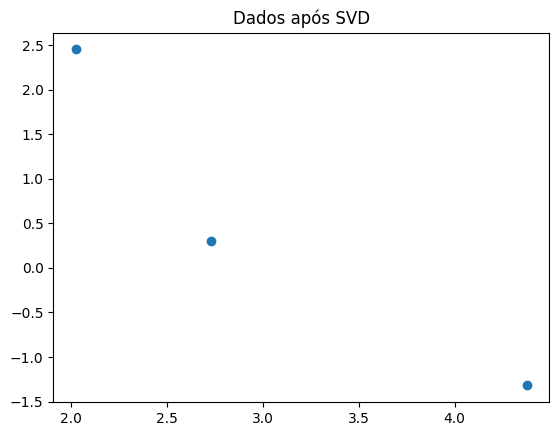

In [15]:
from sklearn.decomposition import TruncatedSVD

# Suponha uma matriz de dados X
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# Visualização
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("Dados após SVD")
plt.show()

**Similaridade por Distância Cosseno**

A distância cosseno mede a similaridade entre vetores.


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similaridade = cosine_similarity([X[0]], [X[1]])
print(f"A similaridade cosseno entre as amostras 0 e 1 é {similaridade[0][0]}")

A similaridade cosseno entre as amostras 0 e 1 é 0.7173448312365569


## Clustering

### K-Means: Conceito e Aplicação

O k-means é um algoritmo de clustering que particiona n observações em k clusters nos quais cada observação pertence ao cluster com a média mais próxima.

**Exemplo:**

c:\Users\iancd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


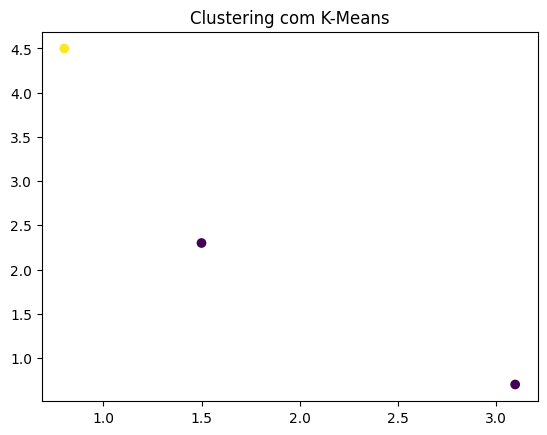

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering com K-Means")
plt.show()

### Performance: Silhouette

O coeficiente de silhouette mede o quão semelhante uma amostra é ao seu próprio cluster em comparação com outros clusters.

**Interpretação:**

Valores próximos de 1 indicam que a amostra está bem agrupada.

In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"O coeficiente de silhouette é {score}")

O coeficiente de silhouette é 0.17016103813063058


## Otimização

### Mínimo Global vs. Mínimos Locais

- **Mínimo Global:** O ponto mais baixo de toda a função.
- **Mínimo Local:** O ponto mais baixo em uma vizinhança.

### Gradient Descent

É um algoritmo de otimização que ajusta os parâmetros para minimizar uma função de custo.

#### Implementação Guiada

In [19]:
# Função de custo: J(θ) = (θ - 3)^2
def custo(theta):
    return (theta - 3) ** 2

# Gradiente da função de custo
def gradiente(theta):
    return 2 * (theta - 3)

# Gradient Descent
theta = 0  # Inicialização
alpha = 0.1  # Taxa de aprendizado

for _ in range(100):
    theta = theta - alpha * gradiente(theta)

print(f"O valor otimizado de θ é {theta}")

O valor otimizado de θ é 2.9999999993888893


#### Análise de Comportamento do Algoritmo

- **Mínimos Locais:** O algoritmo pode ficar preso em mínimos locais.
- **Taxa de Aprendizado:** Um alpha muito grande pode fazer o algoritmo não convergir.

## Regressão Linear

### Interpretação do Modelo

A regressão linear modela a relação entre uma variável dependente e uma ou mais independentes.

**Relação Feature-Peso-Target**

O modelo tenta ajustar uma linha que melhor representa os dados, onde os pesos (coeficientes) indicam a influência de cada feature.

### Equação Normal

Usada para encontrar os valores ótimos dos pesos sem iteração.

$$
\theta = (X^TX)^{-1}X^Ty
$$

**Exemplo:**


In [20]:
# Suponha X e y
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Os pesos calculados são {theta}")

NameError: name 'y' is not defined

## Feature Engineering

### Polinômios

Transformar features em polinomiais pode aumentar a capacidade do modelo de capturar relações não lineares.

**Exemplo:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

### Outras Transformações

- **Normalização**
- **Padronização**
- **Log-transform**

## Aplicação

### Análise Exploratória

Inclui visualizar distribuições, relações entre features e identificação de outliers.

### Construção de Modelo

Combinar modelos lineares com feature engineering para melhorar a performance.


In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_poly, y)

### Avaliação de Modelo

#### Separação Treino-Teste

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)

#### Medida de Desempenho

Usar métricas como MSE (Mean Squared Error) para regressão.

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = modelo.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
print(f"O MSE do modelo é {mse}")